In [28]:

import os
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sys
%matplotlib inline

# Import "valeo" module
sys.path.append("..")
from valeo.infrastructure.LogManager import LogManager as lm
# NB: Initializing logger here allows "class loaders of application classes" to benefit from the global initialization
logger = lm().logger(__name__)  
from valeo.infrastructure import Const
from valeo.infrastructure.generic.DfUtil import DfUtil
from valeo.infrastructure.generic.ImgUtil import ImgUtil
import valeo.infrastructure.Transformer as transf

# Notebook automatic reload
%load_ext autoreload
%reload_ext autoreload
%aimport valeo.infrastructure.Transformer 
%aimport valeo.infrastructure.LogManager
%aimport valeo.infrastructure.Const
%aimport valeo.infrastructure.generic.DfUtil
%aimport valeo.infrastructure.generic.ImgUtil



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:


data = DfUtil.loadCsvData([Const.rootData() , "train", "traininginputs.csv"])
if data is not None:
    data.info()

# l = ["data", "train", "traininginputs.csv"]
# print(*l[1:])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

In [30]:
data.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61


In [31]:
# Highlight missing data
data.isna().sum()

PROC_TRACEINFO                         0
OP070_V_1_angle_value                  0
OP090_SnapRingPeakForce_value          0
OP070_V_2_angle_value                  0
OP120_Rodage_I_mesure_value            0
OP090_SnapRingFinalStroke_value        0
OP110_Vissage_M8_torque_value          0
OP100_Capuchon_insertion_mesure    18627
OP120_Rodage_U_mesure_value            0
OP070_V_1_torque_value                 0
OP090_StartLinePeakForce_value         0
OP110_Vissage_M8_angle_value           0
OP090_SnapRingMidPointForce_val        0
OP070_V_2_torque_value                 0
dtype: int64

In [32]:
data.info()
# 1 - On constate que plus de la moitié des valeurs de la feature 7 sont manquants
#     7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
# 2 - Toutes les feature sont numériques, pas de features catégoriques
# 3 - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

In [33]:
# Remove Identifier from features
X_data = data.drop(columns = "PROC_TRACEINFO")
X_data.head(10)

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61
5,158.7,165.79,178.4,112.09,11.88,12.15,NaN,11.97,6.62,25.99,22.3,97.13,6.63
6,158.8,153.91,152.5,111.25,12.11,12.19,0.38,11.97,6.41,18.79,17.7,81.56,6.40
7,181.0,164.02,175.8,117.50,11.75,12.14,NaN,11.97,6.61,24.33,36.0,95.12,6.62
8,156.1,159.50,151.8,111.75,12.09,12.21,NaN,11.97,6.61,26.07,16.6,101.57,6.61
9,159.4,162.99,128.3,107.68,11.88,12.35,NaN,11.98,6.62,24.05,17.9,99.20,6.60


In [34]:
# https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/
# https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/linear-nonlinear-and-monotonic-relationships/    
    

In [35]:
data[["OP070_V_1_angle_value","OP070_V_1_torque_value","OP070_V_2_angle_value","OP070_V_2_torque_value","OP110_Vissage_M8_angle_value","OP110_Vissage_M8_torque_value"]].describe()
# OP070_V_1_angle_value, OP070_V_2_angle_value: Std à 10% de la moyenne. Pas important
# ==============
# 1 - Aucun Min égal à 0
# 2 - OP070_V_2_angle_value : Outlier côté Min
# 3 - OP110_Vissage_M8_angle_value : Outlier côté Max
# 4 - OP110_Vissage_M8_torque_value : Presque Constant

,OP070_V_1_angle_value,OP070_V_1_torque_value,OP070_V_2_angle_value,OP070_V_2_torque_value,OP110_Vissage_M8_angle_value,OP110_Vissage_M8_torque_value
count,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000
mean,159.906922,6.548403,159.618236,6.550867,17.878398,12.256785
std,15.662650,0.097602,15.091490,0.094814,6.785079,0.065319
min,101.800000,5.670000,82.000000,5.740000,6.300000,12.030000
25%,148.700000,6.410000,149.400000,6.420000,13.500000,12.210000
50%,158.000000,6.610000,158.700000,6.610000,16.400000,12.260000
75%,169.300000,6.620000,168.900000,6.610000,20.200000,12.300000
max,198.300000,6.670000,198.100000,6.670000,84.600000,12.500000


In [36]:
data[["OP090_StartLinePeakForce_value","OP090_SnapRingMidPointForce_val","OP090_SnapRingPeakForce_value","OP090_SnapRingFinalStroke_value"]].describe()
# OP090_StartLinePeakForce_value
# OP090_SnapRingMidPointForce_val
# OP090_SnapRingPeakForce_value
# OP090_SnapRingFinalStroke_value:
# ==============
# 1 - Min equal à 0 pour tout les features 
#     => Probablement mauvaise valeurs (noise) => Utiliser Imputer pour leur attribuer une valeur 
# 2 - OP090_StartLinePeakForce_value : Max est un Outlier

# TODO: Calculer le nombre de ligne whose Min(x) is equal à 0

,OP090_StartLinePeakForce_value,OP090_SnapRingMidPointForce_val,OP090_SnapRingPeakForce_value,OP090_SnapRingFinalStroke_value
count,34515.000000,34515.000000,34515.000000,34515.000000
mean,23.630152,97.700978,156.915055,11.970190
std,2.546341,6.837714,11.271492,0.169873
min,0.000000,0.000000,0.000000,0.000000
25%,22.280000,94.310000,149.210000,11.850000
50%,23.880000,98.500000,156.180000,12.040000
75%,25.290000,102.230000,164.380000,12.080000
max,43.410000,127.300000,196.920000,12.190000


In [37]:
# data["OP090_StartLinePeakForce_value"].min()
# print(data[data["OP090_StartLinePeakForce_value"] == 0].count())   # 3
# print(data[data["OP090_SnapRingMidPointForce_val"] == 0].count())
# print(data[data["OP090_SnapRingPeakForce_value"] == 0].count())
# print(data[data["OP090_SnapRingFinalStroke_value"] == 0].count())
data[data["OP090_StartLinePeakForce_value"] == 0]

# 3 lignes dont les fetaures sont egales à 0 => Probablement mauvaise valeurs (noise) 
# => Utiliser Imputer pour leur attribuer une valeur 


,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
549,I-B-XA1207672-190907-01953,137.4,0.0,166.7,105.51,0.0,12.22,0.41,11.97,6.43,0.0,20.6,0.0,6.40
1651,I-B-XA1207672-190821-01367,178.7,0.0,170.4,112.95,0.0,12.33,0.39,11.97,6.61,0.0,12.8,0.0,6.61
22483,I-B-XA1207672-190424-02168,166.4,0.0,171.5,117.26,0.0,12.16,NaN,11.97,6.62,0.0,13.3,0.0,6.61


In [38]:
data[["OP120_Rodage_I_mesure_value","OP120_Rodage_U_mesure_value","OP100_Capuchon_insertion_mesure"]].describe()
# 
# OP120_Rodage_U_mesure_value + OP100_Capuchon_insertion_mesure : Très petite variance
# OP120_Rodage_I_mesure_value: Outlier cote Max + petite variance

,OP120_Rodage_I_mesure_value,OP120_Rodage_U_mesure_value,OP100_Capuchon_insertion_mesure
count,34515.000000,34515.000000,15888.000000
mean,113.350222,11.971027,0.388173
std,3.528522,0.003050,0.024425
min,99.990000,11.970000,0.240000
25%,111.040000,11.970000,0.380000
50%,113.160000,11.970000,0.390000
75%,115.380000,11.970000,0.410000
max,177.950000,11.990000,0.420000


In [39]:
# Q3 + 1,5*IQR = 115.38 + 1,5 * 4,34 = 121,89
filter_q3 = data["OP120_Rodage_I_mesure_value"] > 121.89
data[filter_q3].count()

PROC_TRACEINFO                     510
OP070_V_1_angle_value              510
OP090_SnapRingPeakForce_value      510
OP070_V_2_angle_value              510
OP120_Rodage_I_mesure_value        510
OP090_SnapRingFinalStroke_value    510
OP110_Vissage_M8_torque_value      510
OP100_Capuchon_insertion_mesure    207
OP120_Rodage_U_mesure_value        510
OP070_V_1_torque_value             510
OP090_StartLinePeakForce_value     510
OP110_Vissage_M8_angle_value       510
OP090_SnapRingMidPointForce_val    510
OP070_V_2_torque_value             510
dtype: int64

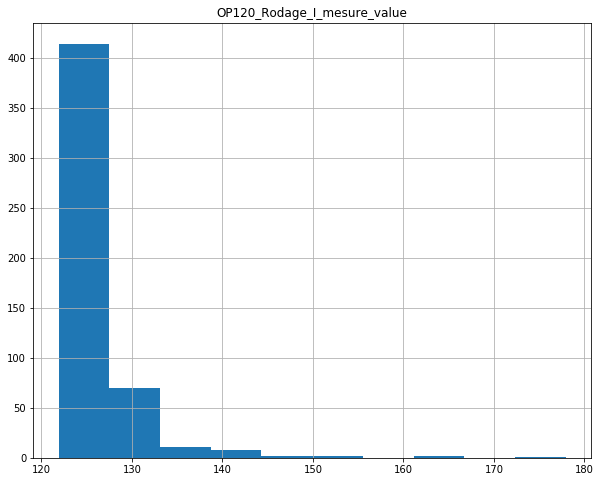

In [40]:
data.loc[filter_q3, ["OP120_Rodage_I_mesure_value"]].hist(bins=10, figsize=(10,8))
plt.show()

In [41]:
tsf = transf.Transformer()
X_data_transformed = tsf.iterative_imputer_transform(X_data)
# print(X_data_transformed.head(10))

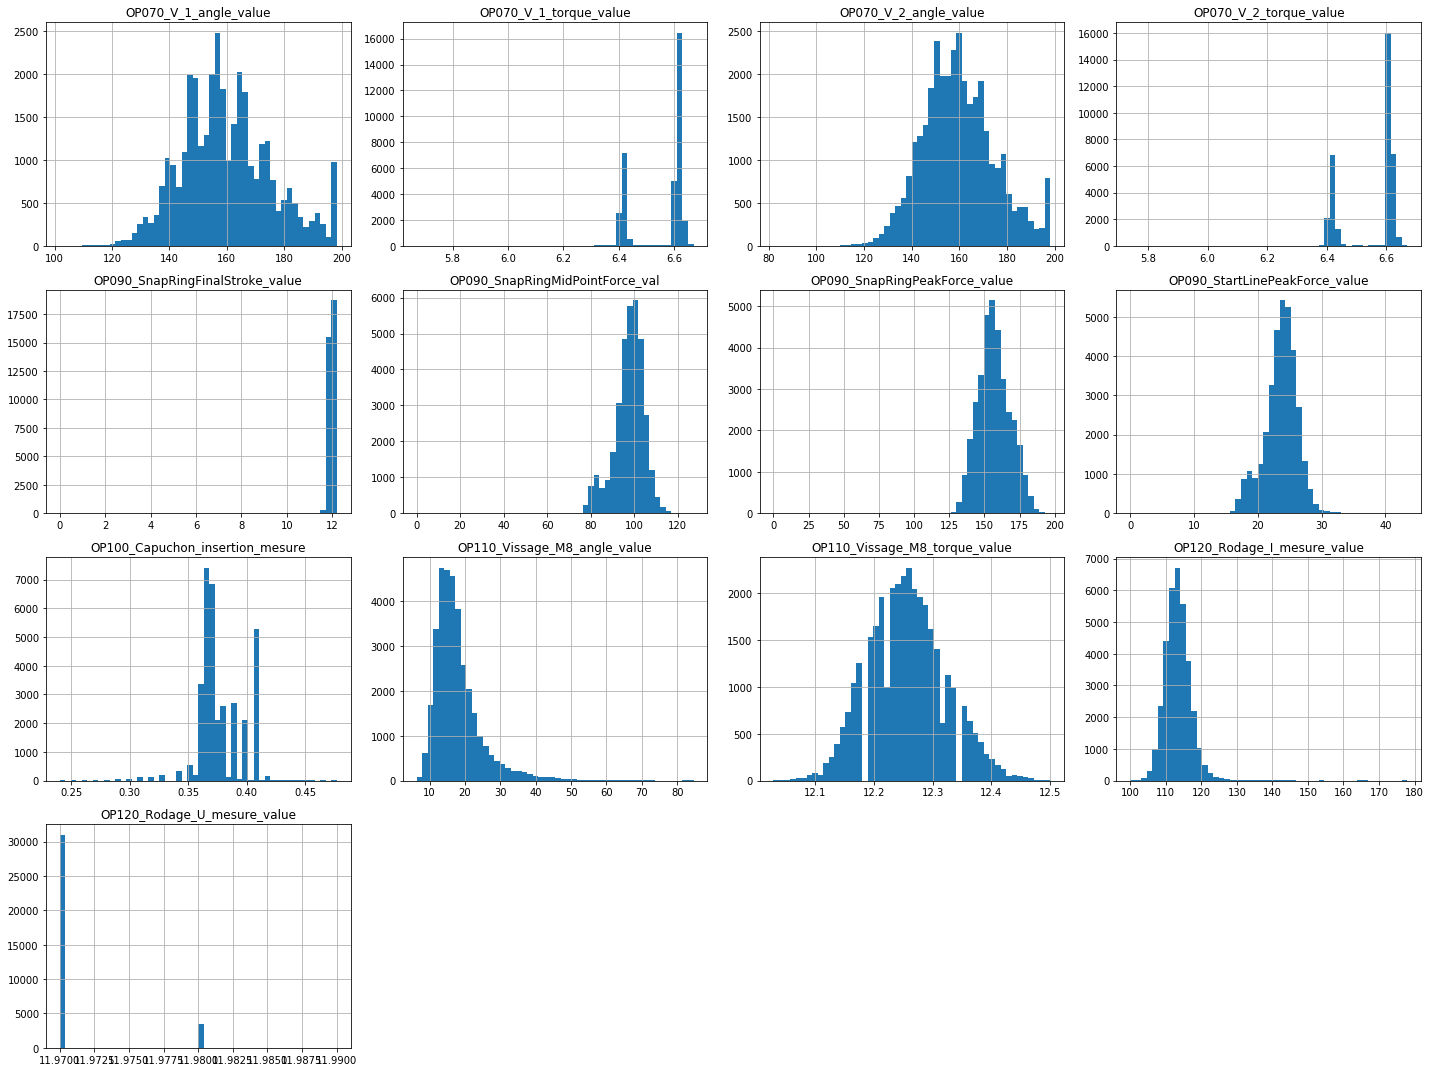

In [42]:
ImgUtil.save_df_hist_plot(X_data_transformed,"X_data_transformed")
plt.show()

In [43]:
tsf = transf.Transformer()
X_data_offset_1 = X_data + 1
X_data_transformed_log10 = tsf.iterative_imputer_transform(X_data_offset_1.applymap(np.log10))
# print(X_data_transformed_log10.head(10))

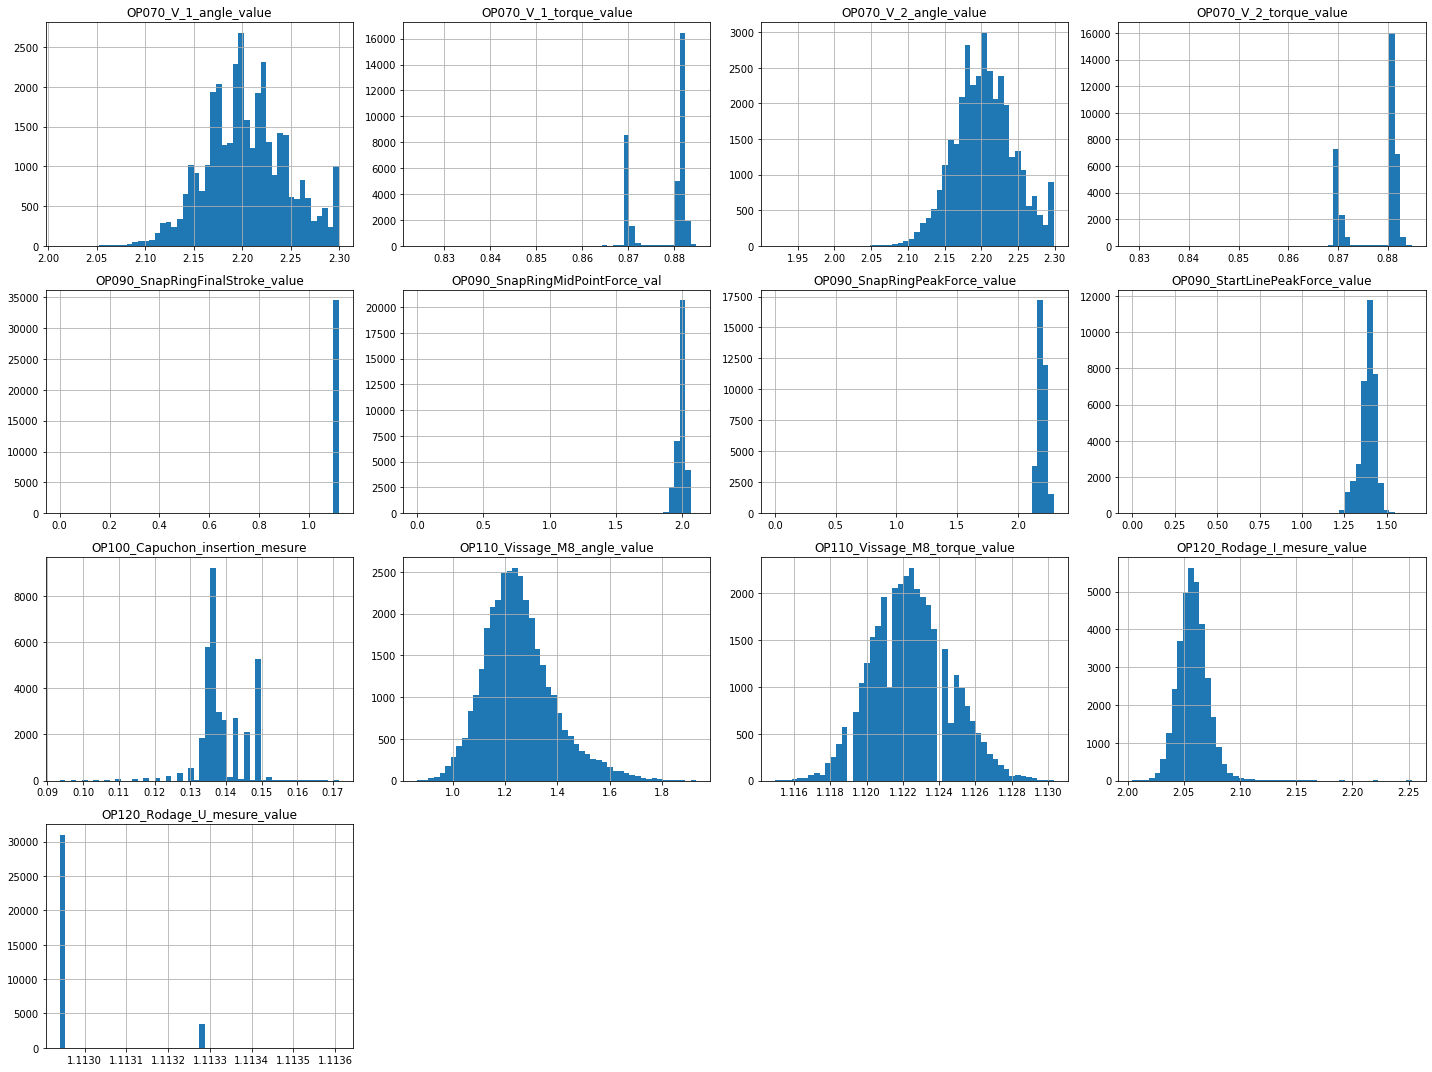

In [44]:
ImgUtil.save_df_hist_plot(X_data_transformed_log10,"X_data_transformed_log10")
plt.show()

In [45]:
#----------------------
# DONT RETAIN THIS CODE : Ceci correspond à Plot data.Log10 without any imputation et ça était déjà fait
#----------------------
# import math
# data_num_features = data.drop(columns = "PROC_TRACEINFO") + 1
# data_num_features.applymap(np.log10).describe()
# data_num_features.applymap(np.log10).hist(bins=50, figsize=(20,15))
# ImgUtil.save_fig("attribute_histogram_plots_log10")
# plt.show()

In [46]:
#----------------------
# DONT RETAIN THIS CODE : Ceci génère un scatter plot trés dense sans aucune aunucen valeur
#----------------------
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
# from pandas.plotting import scatter_matrix
# attributes = [
# "OP070_V_1_angle_value","OP070_V_1_torque_value","OP070_V_2_angle_value","OP070_V_2_torque_value","OP110_Vissage_M8_angle_value","OP110_Vissage_M8_torque_value",
# "OP090_StartLinePeakForce_value","OP090_SnapRingMidPointForce_val","OP090_SnapRingPeakForce_value","OP090_SnapRingFinalStroke_value",
# "OP120_Rodage_I_mesure_value","OP120_Rodage_U_mesure_value","OP100_Capuchon_insertion_mesure"]
# scatter_matrix(data[attributes], figsize=(20,15))
# ImgUtil.save_fig("scatter_matrix_plot")
# plt.show()

In [47]:
#----------------------
# DONT RETAIN THIS CODE : Idem ci dessus
#----------------------

# from pandas.plotting import scatter_matrix

# attributes = [
# "OP070_V_1_angle_value","OP070_V_1_torque_value","OP070_V_2_angle_value","OP070_V_2_torque_value","OP110_Vissage_M8_angle_value","OP110_Vissage_M8_torque_value",
# "OP090_StartLinePeakForce_value","OP090_SnapRingMidPointForce_val","OP090_SnapRingPeakForce_value","OP090_SnapRingFinalStroke_value",
# "OP120_Rodage_I_mesure_value","OP120_Rodage_U_mesure_value","OP100_Capuchon_insertion_mesure"]
# scatter_matrix(data[attributes], figsize=(12, 8))
# ImgUtil.save_fig("scatter_matrix_plot")

In [48]:
#----------------------
# DONT RETAIN THIS CODE : Idem ci dessus
#----------------------
# from pandas.plotting import scatter_matrix
# attributes = [
# "OP070_V_1_angle_value","OP070_V_1_torque_value","OP070_V_2_angle_value","OP070_V_2_torque_value","OP110_Vissage_M8_angle_value","OP110_Vissage_M8_torque_value",
# "OP090_StartLinePeakForce_value","OP090_SnapRingMidPointForce_val","OP090_SnapRingPeakForce_value","OP090_SnapRingFinalStroke_value",
# "OP120_Rodage_I_mesure_value","OP120_Rodage_U_mesure_value","OP100_Capuchon_insertion_mesure"]
# scatter_matrix(data[attributes], figsize=(12, 8))
# ImgUtil.save_fig("scatter_matrix_plot")

In [49]:
Y_data = DfUtil.loadCsvData([Const.rootData(), "train", "trainingoutput.csv"])
Y_data.head()

,PROC_TRACEINFO,Binar OP130_Resultat_Global_v
0,I-B-XA1207672-190429-00688,0
1,I-B-XA1207672-190828-00973,0
2,I-B-XA1207672-190712-03462,0
3,I-B-XA1207672-190803-00051,0
4,I-B-XA1207672-190508-03248,0


In [50]:
XY_data = pd.merge(left=data, right=Y_data, how='inner', left_on="PROC_TRACEINFO", right_on="PROC_TRACEINFO")
XY_data.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60,0
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,0
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61,0
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,0
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61,0


In [51]:
XY_data = XY_data.drop(columns = "PROC_TRACEINFO")
XY_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34515 non-null  float64
 1   OP090_SnapRingPeakForce_value    34515 non-null  float64
 2   OP070_V_2_angle_value            34515 non-null  float64
 3   OP120_Rodage_I_mesure_value      34515 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 5   OP110_Vissage_M8_torque_value    34515 non-null  float64
 6   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 7   OP120_Rodage_U_mesure_value      34515 non-null  float64
 8   OP070_V_1_torque_value           34515 non-null  float64
 9   OP090_StartLinePeakForce_value   34515 non-null  float64
 10  OP110_Vissage_M8_angle_value     34515 non-null  float64
 11  OP090_SnapRingMidPointForce_val  34515 non-null  float64
 12  OP070_V_2_torque_v

In [52]:
# ------------------------------------------------------------------------------------
# Correlation Check :
# Correlation entre la target "Binar OP130_Resultat_Global_v" et les autres attributs
# ------------------------------------------------------------------------------------
corr_matrix = XY_data.corr()
corr_matrix["Binar OP130_Resultat_Global_v"].sort_values(ascending=False)

Binar OP130_Resultat_Global_v      1.000000
OP100_Capuchon_insertion_mesure    0.032212
OP090_SnapRingFinalStroke_value    0.015148
OP090_SnapRingMidPointForce_val    0.014273
OP090_StartLinePeakForce_value     0.010720
OP110_Vissage_M8_angle_value       0.005470
OP120_Rodage_I_mesure_value        0.003763
OP110_Vissage_M8_torque_value     -0.002984
OP070_V_2_angle_value             -0.006342
OP090_SnapRingPeakForce_value     -0.007290
OP120_Rodage_U_mesure_value       -0.010492
OP070_V_1_angle_value             -0.012793
OP070_V_1_torque_value            -0.037438
OP070_V_2_torque_value            -0.039752
Name: Binar OP130_Resultat_Global_v, dtype: float64

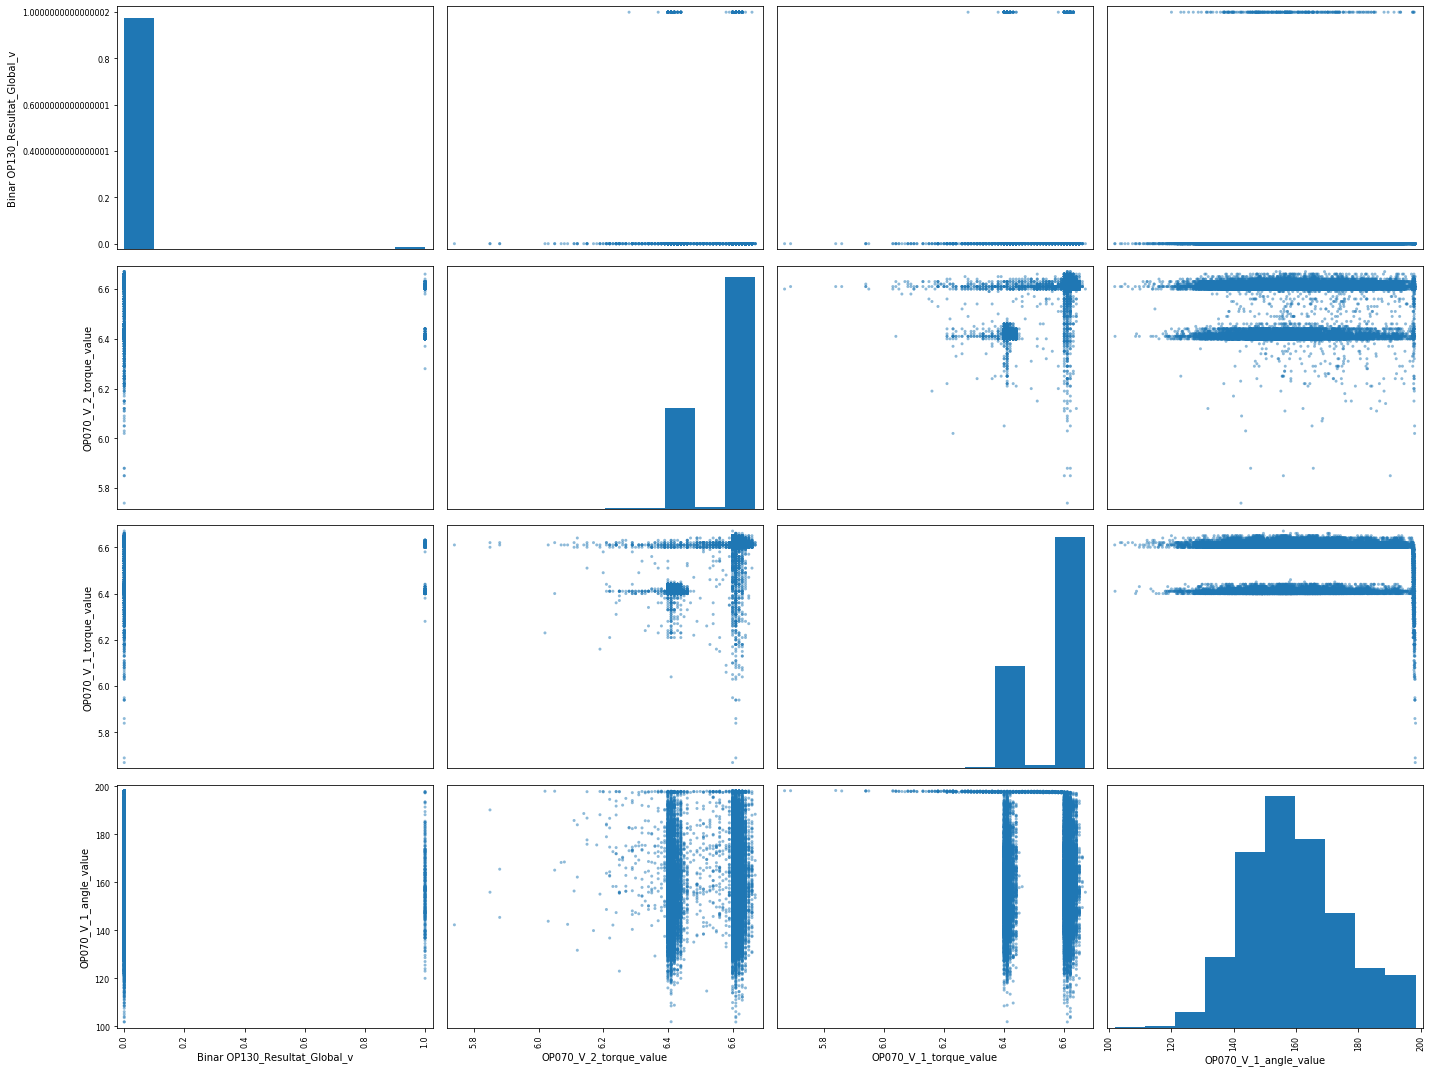

In [53]:
# ------------------------------------------------------------------------------------------
# Correlation Graph entre la target "Binar OP130_Resultat_Global_v" et les autres attributs
# ------------------------------------------------------------------------------------------
attributes = ["Binar OP130_Resultat_Global_v","OP070_V_2_torque_value","OP070_V_1_torque_value","OP070_V_1_angle_value"]
# pd.plotting.scatter_matrix(XY_data[attributes], figsize=(20,15))
ImgUtil.save_df_scatter_plot(XY_data[attributes], "XY_data_corr_1")

In [60]:
# ------------------------------------------------------------------------------------------
# Correlation Graph entre la target "Binar OP130_Resultat_Global_v" et les autres attributs
# ------------------------------------------------------------------------------------------
attributes = ["Binar OP130_Resultat_Global_v","OP100_Capuchon_insertion_mesure","OP090_SnapRingFinalStroke_value","OP090_SnapRingMidPointForce_val"]
# pd.plotting.scatter_matrix(XY_data[attributes], figsize=(20,15))
# ImgUtil.save_fig("scatter_matrix_plot_corr_2")
ImgUtil.save_df_scatter_plot(XY_data[attributes], "XY_data_corr_2")

AttributeError: 'DataFrame' object has no attribute 'plotting'

In [61]:
XY_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34515 non-null  float64
 1   OP090_SnapRingPeakForce_value    34515 non-null  float64
 2   OP070_V_2_angle_value            34515 non-null  float64
 3   OP120_Rodage_I_mesure_value      34515 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 5   OP110_Vissage_M8_torque_value    34515 non-null  float64
 6   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 7   OP120_Rodage_U_mesure_value      34515 non-null  float64
 8   OP070_V_1_torque_value           34515 non-null  float64
 9   OP090_StartLinePeakForce_value   34515 non-null  float64
 10  OP110_Vissage_M8_angle_value     34515 non-null  float64
 11  OP090_SnapRingMidPointForce_val  34515 non-null  float64
 12  OP070_V_2_torque_v

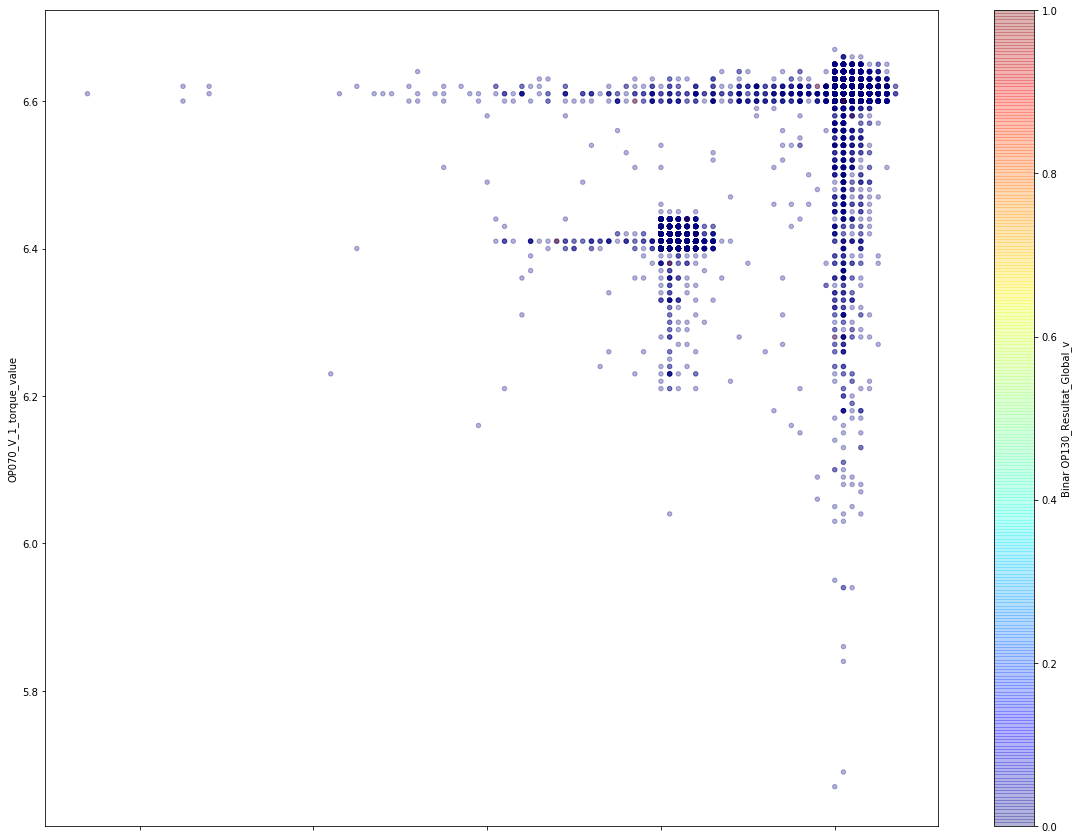

In [33]:
XY_data.plot(kind="scatter", x="OP070_V_2_torque_value", y = "OP070_V_1_torque_value", 
              c="Binar OP130_Resultat_Global_v", cmap=plt.get_cmap("jet"), colorbar = True,
              figsize=(20,15),
              alpha=0.3)  # jet : ranges from Blue(=0) to Red(=1)
# plt.axis([0, 16, 0, 550000])
# ImgUtil.save_fig("income_vs_house_value_scatterplot")

# No conclusion about this code ......

In [ ]:
#   data.drop(columns = "PROC_TRACEINFO")